In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.formula.api import ols

### Question 2

In [2]:
edu = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [3]:
edu.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [4]:
edu.shape

(777, 18)

In [5]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
edu.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [7]:
dup = edu.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))
edu[dup]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [8]:
edu.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### Observations:
1. The dataset has 777 rows and 18 columns.
2. All variables are continuous exept 'name'.
3. The dataset has no duplicate records.
4. The dataset has no null values or missing records.

#### Data Visualization
First we perform Univariate Analysis

In [9]:
edu.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [10]:
edu1 = edu.drop(['Names'],axis=1)
edu1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


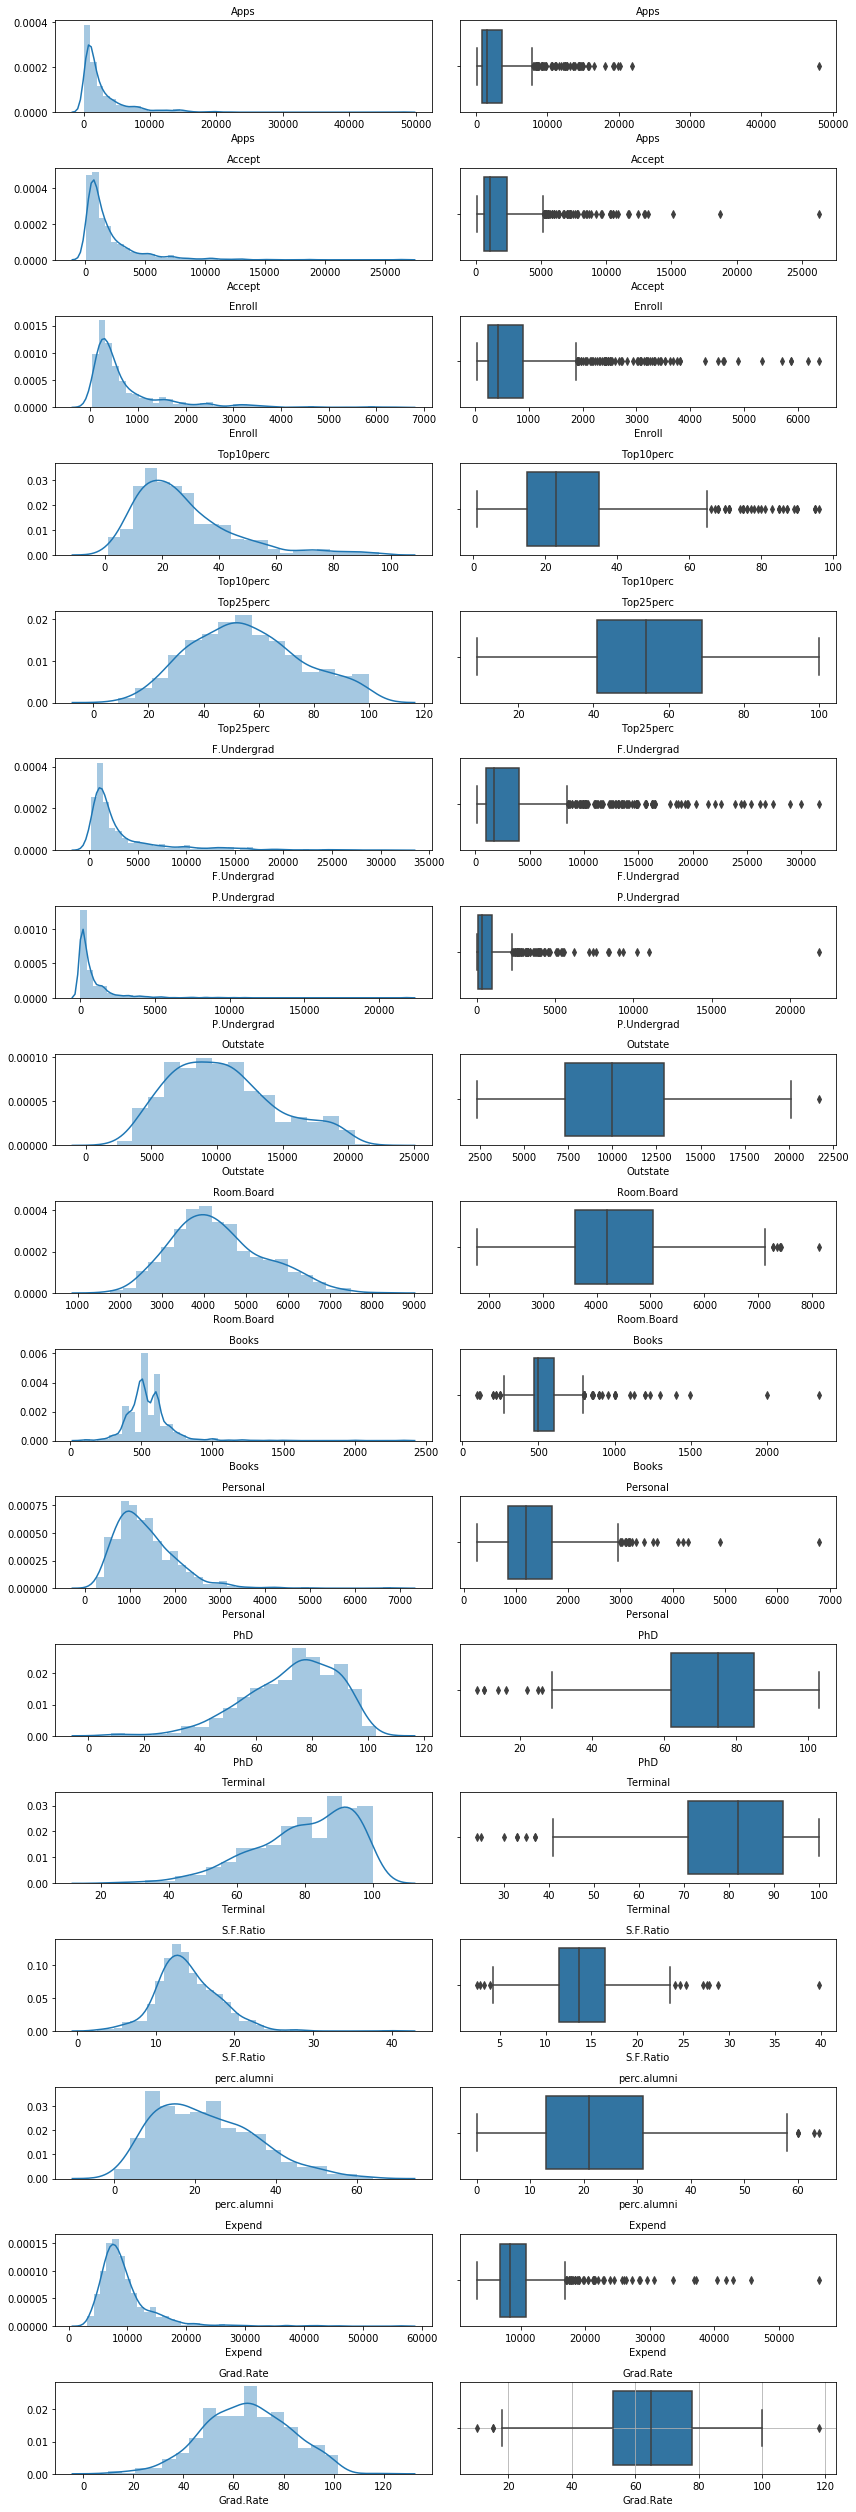

In [11]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)
fig.set_size_inches(12, 35)

continuous = edu1.dtypes[(edu1.dtypes == 'int64')|(edu1.dtypes == 'float64')].index

edu2 = edu1[continuous]

for i in range(0, len(edu2.columns)):
    a = sns.distplot(edu2[edu2.columns[i]] , ax = axes[i][0])
    a.set_title(edu2.columns[i], fontsize = 10)
    a = sns.boxplot(edu2[edu2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(edu2.columns[i], fontsize = 10)
    plt.grid()

plt.tight_layout()

1. All the variables have a normal distribution in the histogram except for the variable 'Books'.
2. Variables Apps, Accept, Enroll, Top10perc, F.Undergrad, P.Undergrad, Expend are extremely left skewed.
3. Variables Top10perc, Personal, S.F.Ratio, are slighlty left skewed.
4. Variables Top25perc, Outstate, Room.Board, Perc.alumni, Grad.Rate dont have much skewness.
5. Variables PhD, Terminal, are slighly right skewed.
6. Outliers are visible in the box plot.

Next we perform Multivariate analysis

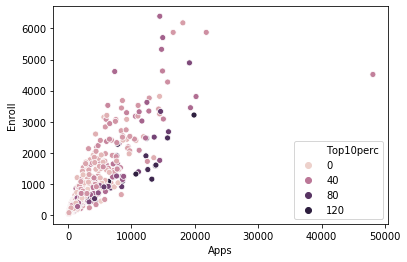

In [12]:
sns.scatterplot(x='Apps', y='Enroll',hue='Top10perc', data=edu1)
plt.show()

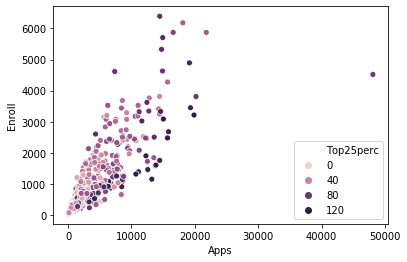

In [13]:
sns.scatterplot(x='Apps', y='Enroll',hue='Top25perc', data=edu1)
plt.show()

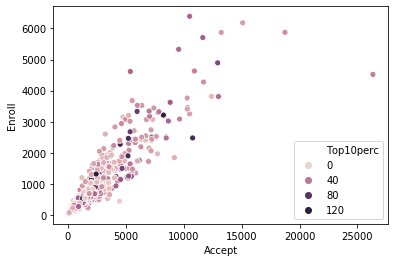

In [14]:
sns.scatterplot(x='Accept', y='Enroll', hue ='Top10perc',data=edu1)
plt.show()

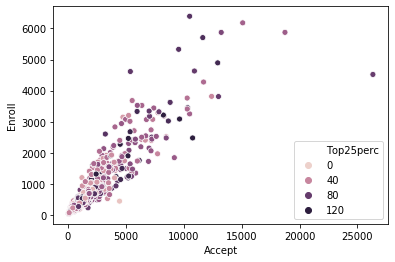

In [15]:
sns.scatterplot(x='Accept', y='Enroll', hue ='Top25perc',data=edu1)
plt.show()

When we plot Apps vs Enroll and use hue variables Top10Perc & Top25Perc, we observe a linear relationship when Apps are below 7500.
When we plot Acceptance vs Enroll and use hue variables Top10Perc & Top25Perc, we observe a linear relationship when Accepts are below 7500.

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [16]:
edu1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [17]:
edu1.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


- Firstly, as we can clearly see from the headings of the columns, different variables have different units. We can see Percentage, Ratio, Currency and counts
- Secondly, the values have a large difference between them.
- Hence it is necessary to normalise these values and in order to do that, we perform scaling.

In [18]:
def z_score(edu1):
    edu1std = edu1.copy()
    for column in edu1.columns:
        edu1std[column] = (edu1std[column] - edu1std[column].mean()) / edu1std[column].std() 
    return edu1std
edu1std1 = z_score(edu1)
edu1std1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346659,-0.320999,-0.063468,-0.258416,-0.191704,-0.168008,-0.209072,-0.745875,-0.964284,-0.601924,1.269228,-0.162923,-0.115654,1.013123,-0.867016,-0.501587,-0.318047
1,-0.210748,-0.038678,-0.288398,-0.655234,-1.353040,-0.209653,0.244150,0.457202,1.907979,1.215097,0.235363,-2.673923,-3.376001,-0.477397,-0.544222,0.166003,-0.550907
2,-0.406604,-0.376076,-0.477814,-0.315105,-0.292690,-0.549212,-0.496770,0.201175,-0.553960,-0.904761,-0.259415,-1.204069,-0.930741,-0.300556,0.585558,-0.177176,-0.667337
3,-0.667830,-0.681243,-0.691982,1.839046,1.676532,-0.657656,-0.520416,0.626229,0.996150,-0.601924,-0.687730,1.184443,1.174900,-1.614235,1.150447,1.791697,-0.376262
4,-0.725709,-0.764063,-0.780232,-0.655234,-0.595647,-0.711466,0.009000,-0.716047,-0.216584,1.517934,0.235363,0.204540,-0.523198,-0.553186,-1.674001,0.241648,-2.937721


We can see the data above with stadardised values.

## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.

First we check the covariance values for both standardised and non standardised values.

In [19]:
edu1.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


In [20]:
edu1std1.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


From the 2 tables above, we can say that the covariance table is not the same. This is expected as standardising changes the values.

Next we check the correlation values for both standardised and non standardised values.

In [21]:
edu1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [22]:
edu1std1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


From the 2 tables above, we can say that the correlation table is the same. This is expected as standardising does not change the values.

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

Before scaling

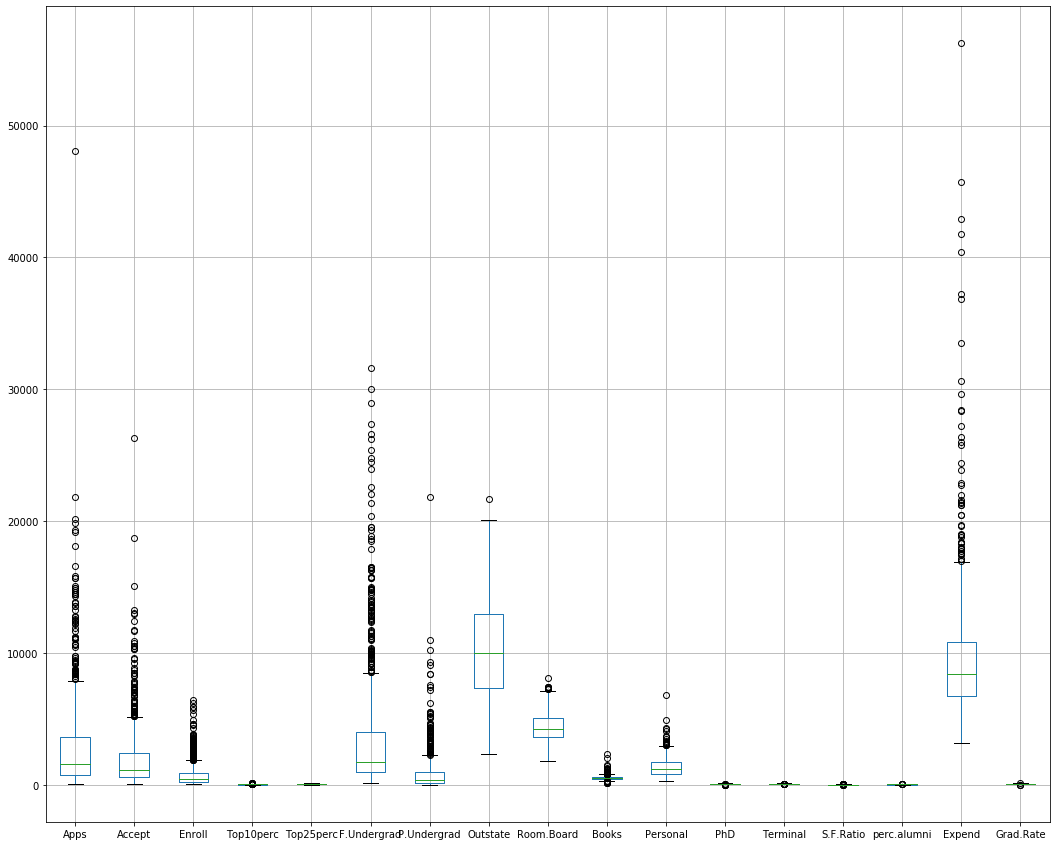

In [23]:
plt.figure(figsize=(18,15))
edu1.boxplot()

After scaling

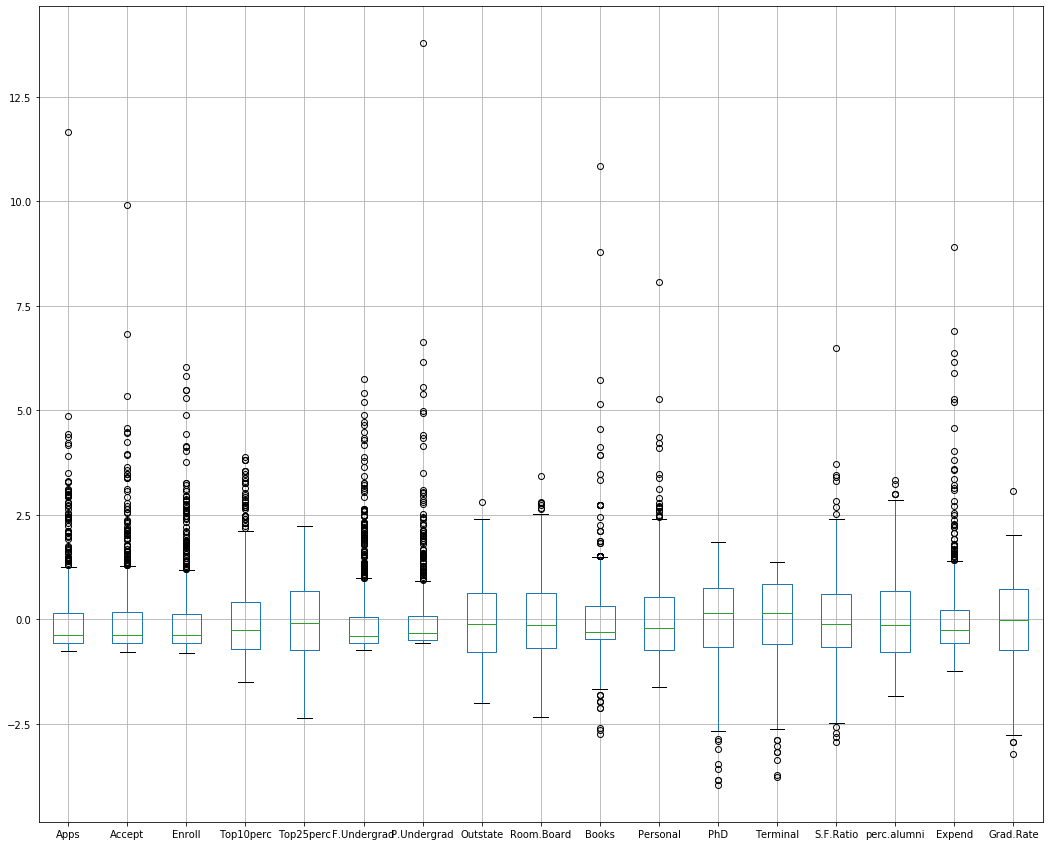

In [24]:
plt.figure(figsize=(18,15))
edu1std1.boxplot()

In [25]:
def outliers (column):
 Q1  = np.percentile(column, 25)
 Q3  = np.percentile(column, 75)
 IQR = Q3 - Q1
 low = Q1 - (1.5 * IQR)
 upp = Q3 + (1.5 * IQR)
 return sum((column<low)|(column>upp))

In [26]:
print("Comparision of Outliers")
print("Non Standardised Apps ", outliers(edu1['Apps']))
print("Standardised Apps ", outliers(edu1std1['Apps']))
print("Non Standardised Accept ", outliers(edu1['Accept']))
print("Standardised Accept ", outliers(edu1std1['Accept']))
print("Non Standardised Enroll ", outliers(edu1['Enroll']))
print("Standardised Enroll ", outliers(edu1std1['Enroll']))
print("Non Standardised Top10perc ", outliers(edu1['Top10perc']))
print("Standardised Top10perc ", outliers(edu1std1['Top10perc']))
print("Non Standardised Top25perc ", outliers(edu1['Top25perc']))
print("Standardised Top25perc ", outliers(edu1std1['Top25perc']))
print("Non Standardised F.Undergrad ", outliers(edu1['F.Undergrad']))
print("Standardised F.Undergrad ", outliers(edu1std1['F.Undergrad']))
print("Non Standardised P.Undergrad ", outliers(edu1['P.Undergrad']))
print("Standardised P.Undergrad ", outliers(edu1std1['P.Undergrad']))
print("Non Standardised Outstate ", outliers(edu1['Outstate']))
print("Standardised Outstate ", outliers(edu1std1['Outstate']))
print("Non Standardised Room.Board ", outliers(edu1['Room.Board']))
print("Standardised Room.Board ", outliers(edu1std1['Room.Board']))
print("Non Standardised Books ", outliers(edu1['Books']))
print("Standardised Books ", outliers(edu1std1['Books']))
print("Non Standardised Personal ", outliers(edu1['Personal']))
print("Standardised Personal ", outliers(edu1std1['Personal']))
print("Non Standardised PhD ", outliers(edu1['PhD']))
print("Standardised PhD ", outliers(edu1std1['PhD']))
print("Non Standardised Terminal ", outliers(edu1['Terminal']))
print("Standardised Terminal ", outliers(edu1std1['Terminal']))
print("Non Standardised S.F.Ratio ", outliers(edu1['S.F.Ratio']))
print("Standardised S.F.Ratio ", outliers(edu1std1['S.F.Ratio']))
print("Non Standardised perc.alumni ", outliers(edu1['perc.alumni']))
print("Standardised perc.alumni ", outliers(edu1std1['perc.alumni']))
print("Non Standardised Expend ", outliers(edu1['Expend']))
print("Standardised Expend ", outliers(edu1std1['Expend']))
print("Non Standardised Grad.Rate ", outliers(edu1['Grad.Rate']))
print("Standardised Grad.Rate ", outliers(edu1std1['Grad.Rate']))

Comparision of Outliers
Non Standardised Apps  70
Standardised Apps  70
Non Standardised Accept  73
Standardised Accept  73
Non Standardised Enroll  79
Standardised Enroll  79
Non Standardised Top10perc  39
Standardised Top10perc  39
Non Standardised Top25perc  0
Standardised Top25perc  0
Non Standardised F.Undergrad  97
Standardised F.Undergrad  97
Non Standardised P.Undergrad  67
Standardised P.Undergrad  67
Non Standardised Outstate  1
Standardised Outstate  1
Non Standardised Room.Board  7
Standardised Room.Board  7
Non Standardised Books  46
Standardised Books  46
Non Standardised Personal  20
Standardised Personal  20
Non Standardised PhD  8
Standardised PhD  8
Non Standardised Terminal  8
Standardised Terminal  8
Non Standardised S.F.Ratio  12
Standardised S.F.Ratio  12
Non Standardised perc.alumni  5
Standardised perc.alumni  5
Non Standardised Expend  48
Standardised Expend  48
Non Standardised Grad.Rate  4
Standardised Grad.Rate  4


We can observe that there are no changes in outliers before and after scaling.

## 2.5 Perform PCA and export the data of the Principal Component scores into a data frame.

In [27]:
pca = PCA(n_components = 11)
edupca=pca.fit_transform(edu1std1)
edupca.transpose()

array([[-1.59183007e+00, -2.19099053e+00, -1.43004259e+00, ...,
        -7.32089041e-01,  7.91422962e+00, -4.69205840e-01],
       [ 7.66839571e-01, -5.78457386e-01, -1.09211544e+00, ...,
        -7.71855228e-02, -2.06699746e+00,  3.66424921e-01],
       [-1.01008475e-01,  2.27733123e+00, -4.37810808e-01, ...,
        -4.05380784e-04,  2.07222892e+00, -1.32805971e+00],
       ...,
       [ 9.30240250e-02,  1.11306351e+00, -1.05384366e-01, ...,
         2.12237860e-01,  8.19162707e-02,  7.23095807e-01],
       [ 4.85614678e-02,  9.64532351e-01,  6.40247449e-01, ...,
         3.00249856e-01,  9.24296458e-01, -1.20817004e+00],
       [ 3.99489868e-01, -2.12372094e-01, -1.54893554e-01, ...,
        -4.71627094e-01,  2.24076359e+00,  2.07035197e-01]])

In [28]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [29]:
edupca = pd.DataFrame(pca.components_,columns = list(edu1std1))
edupca

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
6,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
7,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336
8,-0.090227,-0.177865,-0.128561,0.341100,0.403712,-0.059442,0.560673,-0.004573,0.275023,-0.133663,-0.094469,-0.185182,-0.254938,0.274544,-0.255335,-0.049139,0.041904
9,0.052510,0.041140,0.034488,0.064026,0.014549,0.020847,-0.223106,0.186675,0.298324,-0.082029,0.136028,-0.123452,-0.088578,0.472045,0.423000,0.132286,-0.590271


## 2.6 Extract the eigenvalues, and eigenvectors. [print both]

In [30]:
covmat = np.cov(edu1std1.T)

In [32]:
eigenvalues, eigenvectors = np.linalg.eig(covmat)

print('Eigen vectors \n%s' %eigenvectors)
print('\nEigen values \n%s' %eigenvalues)

Eigen vectors 
[[-2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02  3.50555339e-02 -5.15472524e-02
   3.95434345e-01 -5.26927980e-02 -1.61332069e-01  1.22678028e-01
  -3

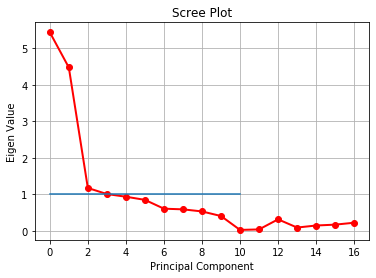

In [33]:
fig = plt.figure(figsize = (6,4))
singvalues = range(edu1std1.shape[1])
plt.plot(singvalues, eigenvalues, 'ro-', linewidth = 2)
plt.plot(range(0,11),np.ones(11))

plt.ylabel('Eigen Value')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

plt.grid()
plt.show()

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [34]:
eigenvectors[0].round(2)

array([-0.25,  0.33, -0.06,  0.28, -0.01, -0.02, -0.04,  0.1 ,  0.09,
       -0.05,  0.36, -0.46,  0.04, -0.13,  0.08, -0.6 ,  0.02])

#### This is the explicit form of the first PC
  (-0.25 * Apps) + (0.33 * Accept)  + (-0.06 * Enroll) + (0.28 * Top10perc) + (-0.01 * Top25perc) + (-0.02 * F.Undergrad) + (-0.04 * P.Undergrad) + (0.1 * Outstate) + (0.09 * Room.Board) + (-0.05 * Books) + (0.36 * Personal) + (-0.46 * PhD) + (0.04 * Terminal) + (-0.13 * S.F.Ratio) + (0.08 * perc.alumni) + (-0.6 * Expend) + (0.02 * Grad.Rate)

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [35]:
total = sum(eigenvalues)
variance = [(i/total)*100 for i in sorted(eigenvalues, reverse=True)]
cumvariance = np.cumsum(variance)
print("Cumulative Variance Explained", cumvariance)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


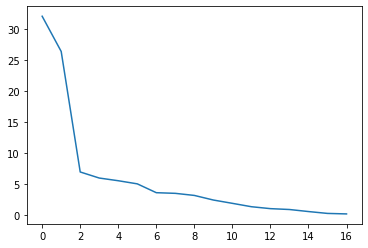

In [36]:
plt.plot(variance)

- We can observe that the first PC contributes 32% while the second PC contributes 26% and the upcoming PCs contibute lesser and lesser
- All the 17 PCs add upto 100% as indicated in the program above.

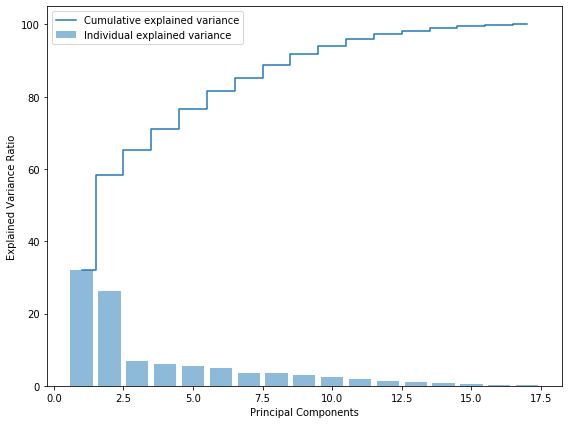

In [37]:
plt.figure(figsize=(8, 6))

plt.step(range(1, eigenvalues.size + 1), cumvariance, where = 'mid', label = 'Cumulative explained variance')
plt.bar(range(1, eigenvalues.size + 1), variance, alpha = 0.5, align = 'center', label = 'Individual explained variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.legend(loc = 'best')
plt.tight_layout()

The number of PCs we select is helped by the % of loss of information that is acceptable for this case study.

#### Eigen values and vectors
- Each Eigen vector is one Principal Component and the next Eigen vector is orthogonal to the previous.
- The corresponding Eigen value determines the strength of the PC.
- Hence it helps us to identify the sequence of the PCs.
- Each element in the Eigen Vector shows us the measure of the corresponding feature variable from the original features list

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

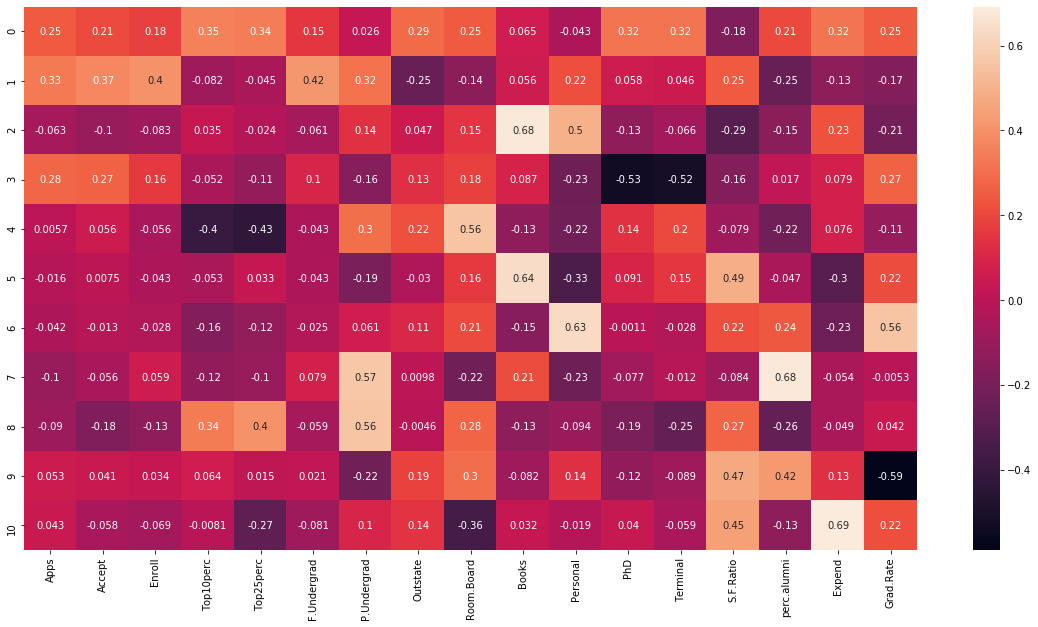

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(edupca,annot=True)
plt.show()

- We observe that with 6 PCs, 81% details of features are captured.
- 80% of the information is carrried by Apps, Accepts, Enroll, Top10perc, Top25perc
- We observe that with 10 PCs, 95% details of features are captured. 
- We also observe that only Apps, Accepts & Enroll have eigen values greater than 1.
- Hence, we consider dimensionality reduction from 17 to 3.
- We can remove the other variables from the analysis as they are not as stable as the first 3.
- The dimension of the data is reduced by more than 82%

The number of PCs we select is helped by the % of loss of information that is acceptable for this case study.